In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr

# Versuch 4: Reihenschwingkreis

### Aufgabe 1
    Visualisieren der Daten

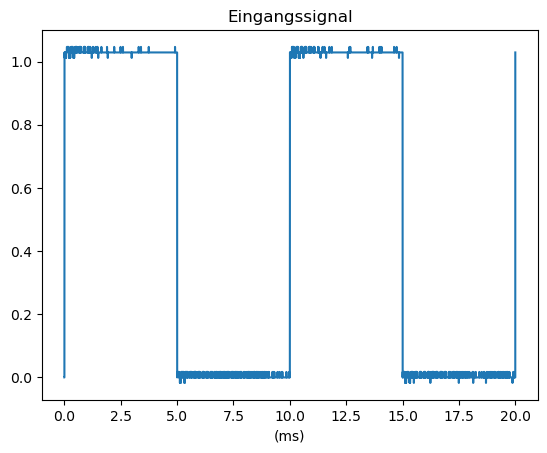

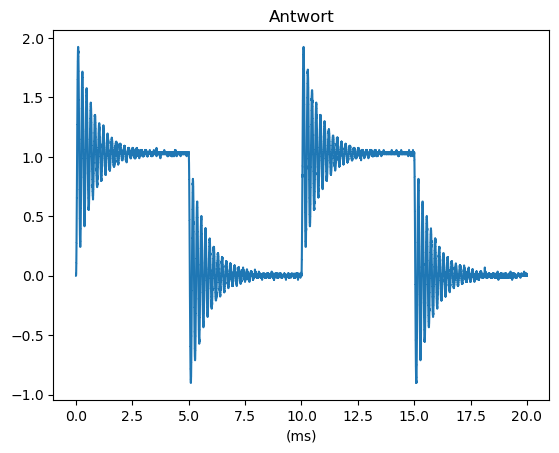

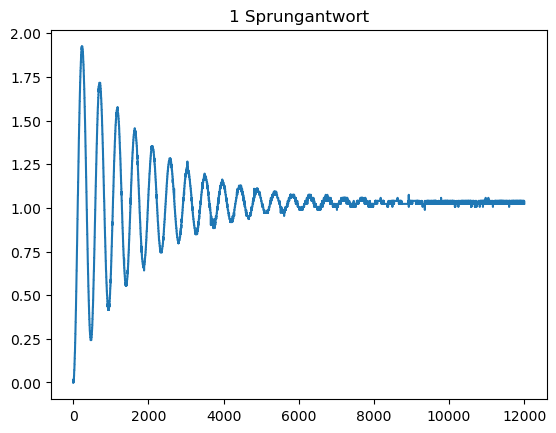

In [39]:
absPath = "C:/Users/tombo/HTWG/AIN/3/technische-grundlagen-der-kuenstlichen-intelligenz/versuch4"
schwingkreis = pd.read_csv(f"{absPath}/reihenschwingkreis.csv", sep=';', decimal=',', header=1)
ms = schwingkreis["(ms)"] + 10
plt.plot(ms, schwingkreis["(V)"])
plt.title("Eingangssignal")
plt.xlabel("(ms)")
plt.show()
plt.plot(ms, schwingkreis["(V).1"])
plt.title("Antwort")
plt.xlabel("(ms)")
plt.show()

sprung = schwingkreis["(V)"][:12000]
sprungResponse = schwingkreis["(V).1"][:12000]
plt.plot(sprungResponse)
plt.title("1 Sprungantwort")
plt.show()

#### Glätten

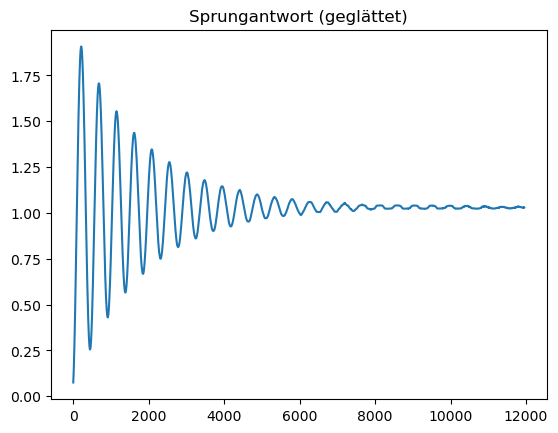

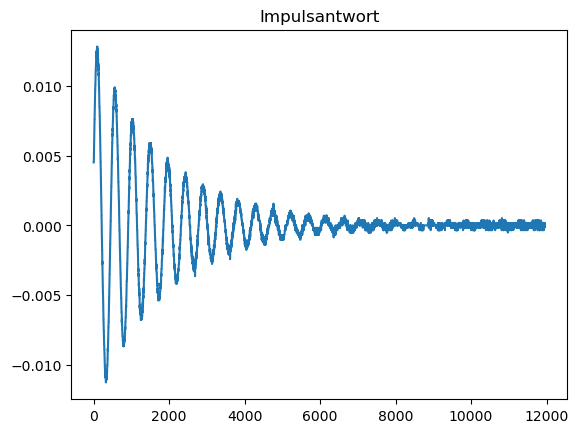

In [34]:
windowSize = 50
filter = np.ones(windowSize) / windowSize
cleanResp = np.convolve(sprungResponse, filter, mode='valid')
plt.plot(cleanResp)
plt.title("Sprungantwort (geglättet)")
plt.show()
ablResp = np.gradient(cleanResp)
plt.plot(ablResp)
plt.title("Impulsantwort")
plt.show()

FFT

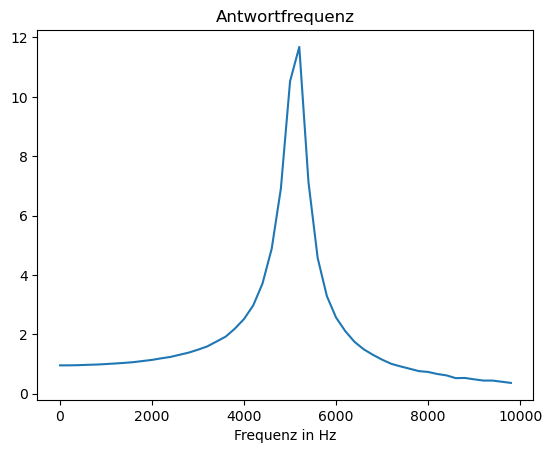

Antwortfrequenz: 5200.0Hz +- 200 Hz
selbst berechnete Frequenz: 5033 Hz


In [57]:
fft = np.abs(np.fft.fft(ablResp))
freqs = np.arange(fft.size) / 0.005
ausschnitt = 50
plt.plot(freqs[: ausschnitt],fft[: ausschnitt])
plt.title("Antwortfrequenz")
plt.xlabel("Frequenz in Hz")
plt.show()
print(f"Antwortfrequenz: {freqs[np.argmax(fft[: ausschnitt])]}Hz +- 200 Hz")
print(f"selbst berechnete Frequenz: 5033 Hz")

## Aufgabe 2: Never Gonna Give You Up

#### Visualisieren von den Song-Daten

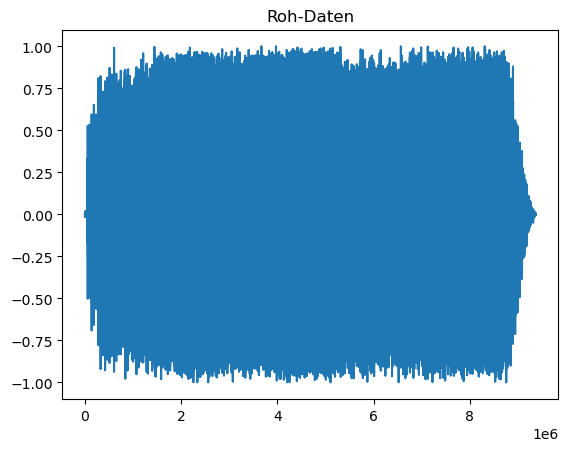

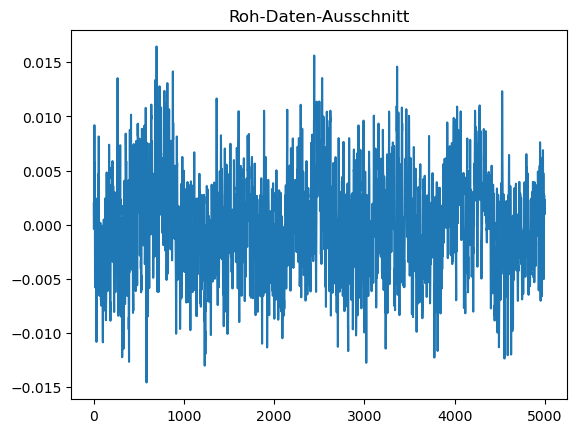

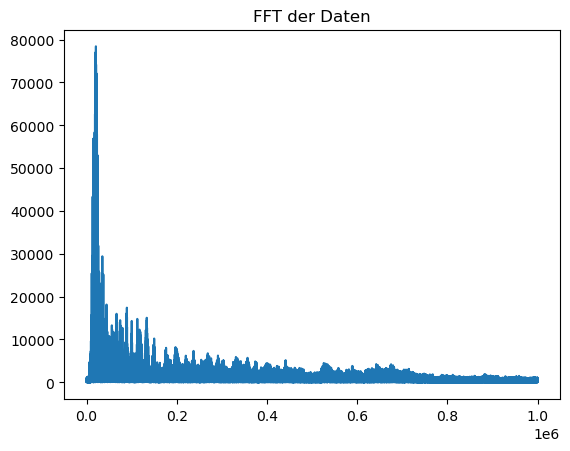

Frequenz der Daten: 96.58056923423669 Hz
Länge: 212.49s


In [4]:
astley, fs = lr.load(f"{absPath}/Rick_Astley_Never_Gonna_Give_You_Up.wav", sr=None)
plt.plot(astley)
plt.title("Roh-Daten")
plt.show()
plt.plot(astley[10000:15000])
plt.title("Roh-Daten-Ausschnitt")
plt.show()
fft = np.abs(np.fft.fft(astley))
plt.plot(fft[0:1000000])
plt.title("FFT der Daten")
plt.show()
print(f"Frequenz der Daten: {np.argmax(np.abs(fft[:5000000])) * fs / fft.size} Hz")
print(f"Länge: {astley.size / fs:0.2f}s")